In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
company=pd.read_csv("E:\\itsstudytym\\assignments\\DT\\Company_Data.csv")

In [3]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
company.shape

(400, 11)

In [6]:
for i in range(0,len(company['Sales'])):
    if company['Sales'][i] > 7.490:
        company['Sales'][i]=1
    else:
        company['Sales'][i]=0

C:\Users\sonih\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sonih\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [7]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1.0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,1.0,111,48,16,260,83,Good,65,10,Yes,Yes
2,1.0,113,35,10,269,80,Medium,59,12,Yes,Yes
3,0.0,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0.0,141,64,3,340,128,Bad,38,13,Yes,No


In [8]:
company['Sales']=company['Sales'].astype(int)

In [9]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,Bad,42,17,Yes,Yes
1,1,111,48,16,260,83,Good,65,10,Yes,Yes
2,1,113,35,10,269,80,Medium,59,12,Yes,Yes
3,0,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0,141,64,3,340,128,Bad,38,13,Yes,No


In [10]:
import seaborn as sbn

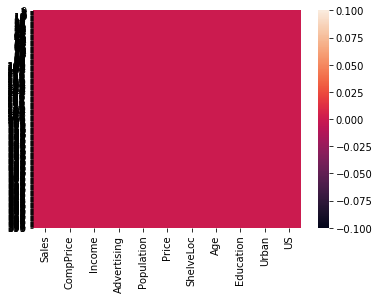

In [11]:
sbn.heatmap(company.isnull(),yticklabels=True)

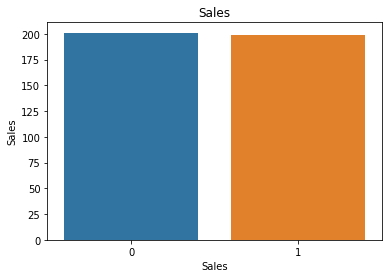

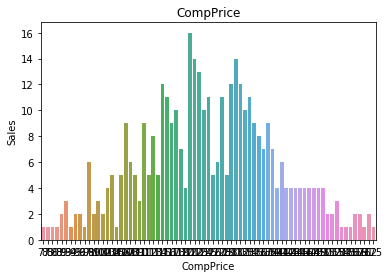

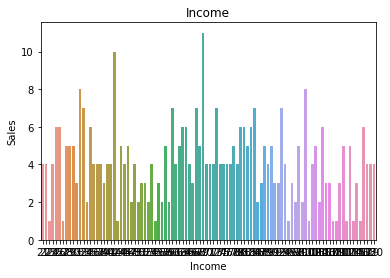

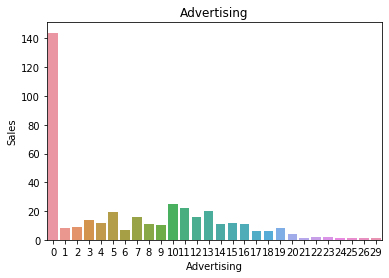

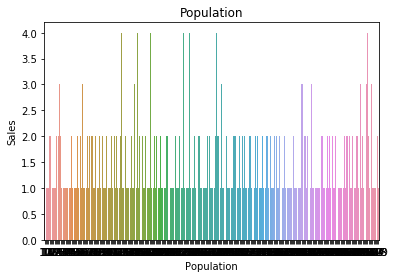

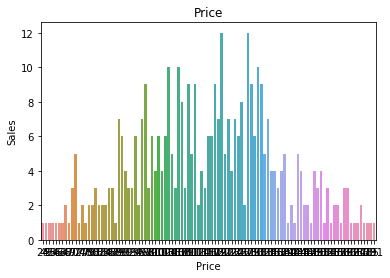

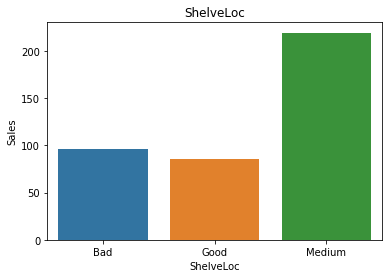

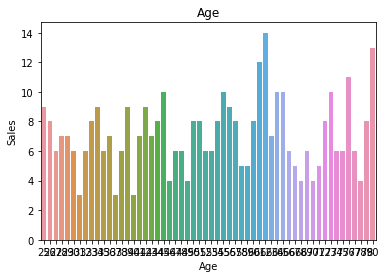

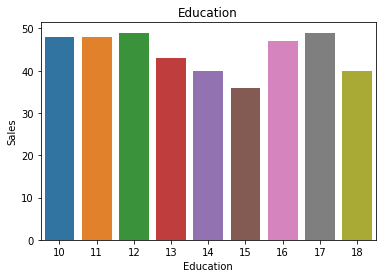

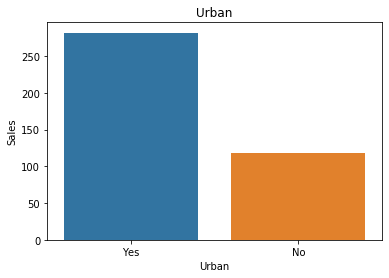

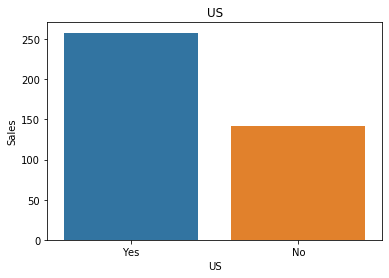

In [13]:
for feature in company.columns:
    sbn.countplot(feature,data=company)
    plt.xlabel(feature)
    plt.ylabel('Sales')
    plt.title(feature)
    plt.show()

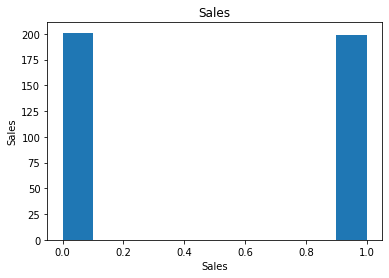

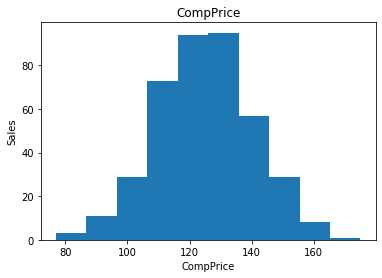

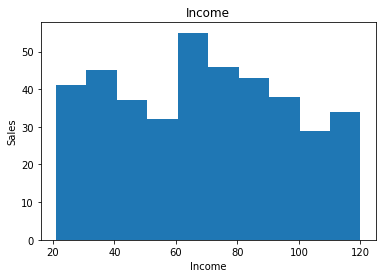

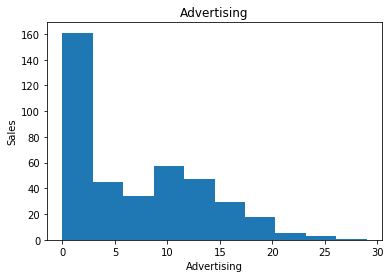

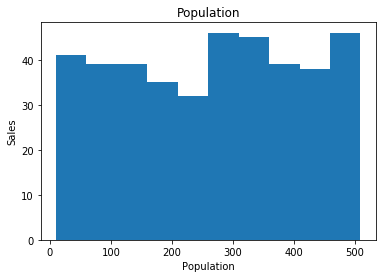

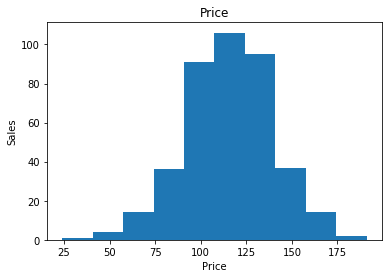

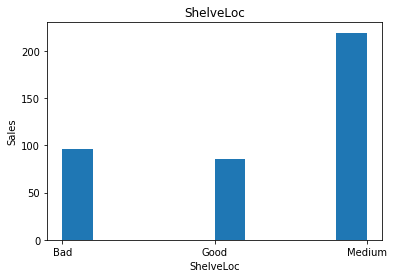

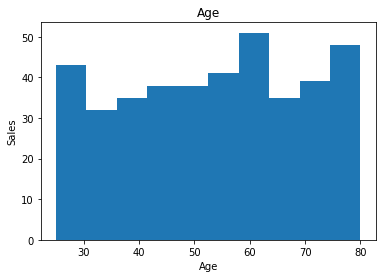

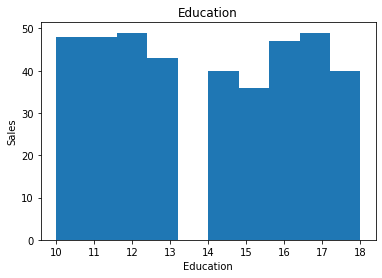

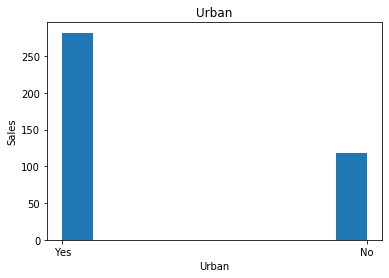

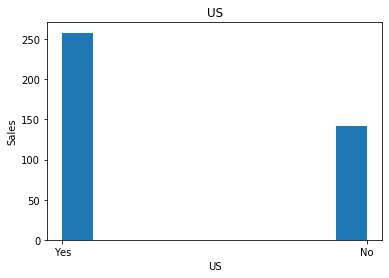

In [14]:
for feature in company.columns:
    plt.hist(feature,data=company)
    plt.xlabel(feature)
    plt.ylabel('Sales')
    plt.title(feature)
    plt.show()

In [15]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,Bad,42,17,Yes,Yes
1,1,111,48,16,260,83,Good,65,10,Yes,Yes
2,1,113,35,10,269,80,Medium,59,12,Yes,Yes
3,0,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0,141,64,3,340,128,Bad,38,13,Yes,No


In [16]:
company['Urban']=pd.get_dummies(company['Urban'],drop_first=True)
company['US']=pd.get_dummies(company['US'],drop_first=True)

In [19]:
ShelveLoc=pd.get_dummies(company['ShelveLoc'],drop_first=True)

In [20]:
company=pd.concat([company,ShelveLoc],axis=1)

In [22]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Good,Medium
0,1,138,73,11,276,120,Bad,42,17,1,1,0,0
1,1,111,48,16,260,83,Good,65,10,1,1,1,0
2,1,113,35,10,269,80,Medium,59,12,1,1,0,1
3,0,117,100,4,466,97,Medium,55,14,1,1,0,1
4,0,141,64,3,340,128,Bad,38,13,1,0,0,0


In [23]:
company=company.drop('ShelveLoc',axis=1)

In [25]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,Good,Medium
0,1,138,73,11,276,120,42,17,1,1,0,0
1,1,111,48,16,260,83,65,10,1,1,1,0
2,1,113,35,10,269,80,59,12,1,1,0,1
3,0,117,100,4,466,97,55,14,1,1,0,1
4,0,141,64,3,340,128,38,13,1,0,0,0


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X=company.iloc[:,1:]
y=company.iloc[:,:1]

In [28]:
X.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,Good,Medium
0,138,73,11,276,120,42,17,1,1,0,0
1,111,48,16,260,83,65,10,1,1,1,0
2,113,35,10,269,80,59,12,1,1,0,1
3,117,100,4,466,97,55,14,1,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=False)

In [32]:
DT=tree.DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [38]:
y_pred=DT.predict(X_test)

In [34]:
DT.score(X_test,y_test)

0.7083333333333334

In [40]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.67      0.71      0.69        55\n           1       0.74      0.71      0.72        65\n\n    accuracy                           0.71       120\n   macro avg       0.71      0.71      0.71       120\nweighted avg       0.71      0.71      0.71       120\n'

In [1]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

NameError: name 'y_test' is not defined

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[39, 16],
       [19, 46]], dtype=int64)